In [92]:
# library(glmnet)
source(here("R/robust_lasso.R"))
# 测试 Lasso 回归函数
result <- robust_lasso(simulated_data$X, simulated_data$y, lambda = 0.05, method = "auto")
print(result)

[1] "FISTA"
$method
[1] "FISTA"

$fit
$fit$beta
           [,1]
 [1,] 0.0000000
 [2,] 1.4272402
 [3,] 3.0690195
 [4,] 0.7908441
 [5,] 3.4335484
 [6,] 2.8472155
 [7,] 2.2948152
 [8,] 2.5199859
 [9,] 2.1631907
[10,] 1.4909345
[11,] 1.6115168
[12,] 0.0000000
[13,] 0.0000000
[14,] 0.0000000
[15,] 0.0000000
[16,] 0.0000000
[17,] 0.0000000
[18,] 0.0000000
[19,] 0.0000000
[20,] 0.0000000
[21,] 0.0000000
[22,] 0.0000000
[23,] 0.0000000
[24,] 0.0000000
[25,] 0.0000000
[26,] 0.0000000
[27,] 0.0000000
[28,] 0.0000000
[29,] 0.0000000
[30,] 0.0000000
[31,] 0.0000000
[32,] 0.0000000
[33,] 0.0000000
[34,] 0.0000000
[35,] 0.0000000
[36,] 0.0000000
[37,] 0.0000000
[38,] 0.0000000
[39,] 0.0000000
[40,] 0.0000000
[41,] 0.0000000
[42,] 0.0000000
[43,] 0.0000000
[44,] 0.0000000
[45,] 0.0000000
[46,] 0.0000000
[47,] 0.0000000
[48,] 0.0000000
[49,] 0.0000000
[50,] 0.0000000
[51,] 0.0000000

$fit$iter
[1] 80

$fit$convergence
[1] TRUE




In [83]:
set.seed(123)

# 模拟数据集生成函数
generate_simulated_data <- function(n_samples = 100, n_features = 50, n_informative = 10, noise = 0.1) {
  X <- matrix(rnorm(n_samples * n_features), nrow = n_samples, ncol = n_features)
  beta <- c(rnorm(n_informative, mean = 2), rep(0, n_features - n_informative)) # 稀疏系数
  y <- X %*% beta + rnorm(n_samples, sd = noise) # 响应变量加噪声
  list(X = X, y = as.vector(y), true_beta = beta)
}

# 生成模拟数据
simulated_data <- generate_simulated_data(n_samples = 100, n_features = 50, n_informative = 10, noise = 0.1)
X <- simulated_data$X
y <- simulated_data$y
true_beta <- simulated_data$true_beta


  
  


In [6]:
source("robust_lasso.R")

In [93]:
# 假设 robust_lasso 已实现，返回值包含 method 和 fit 两个部分
result <- robust_lasso(X, y, lambda = 0.05, method = "auto")
print(result$method) # 期望输出 "Lasso"
# 提取拟合系数和截距
estimated_beta <- as.vector(result$fit$beta[-1]) # 去掉截距项
intercept <- result$fit$a0                      # 截距

# 检查维度是否匹配
cat("Dimensions of X:", dim(X), "\n")
cat("Length of estimated_beta:", length(estimated_beta), "\n")

# 确保维度一致后计算预测值
if (ncol(X) != length(estimated_beta)) {
  stop("The dimensions of X and estimated_beta do not match!")
}
y_pred <- X %*% estimated_beta + intercept # 加入截距项



[1] "FISTA"
[1] "FISTA"
Dimensions of X: 100 50 
Length of estimated_beta: 50 


In [94]:
# --- 计算拟合质量指标 ---
compute_metrics <- function(true_beta, estimated_beta, y, y_pred) {
  mse <- mean((estimated_beta - true_beta)^2)
  relative_error <- sqrt(sum((estimated_beta - true_beta)^2)) / sqrt(sum(true_beta^2))
  sparsity_match <- sum((estimated_beta != 0) == (true_beta != 0)) / length(true_beta)
  
  # 计算 R^2
  rss <- sum((y - y_pred)^2) # Residual Sum of Squares
  tss <- sum((y - mean(y))^2) # Total Sum of Squares
  r_squared <- 1 - (rss / tss)
  list(MSE = mse, Relative_Error = relative_error, Sparsity_Match = sparsity_match, R_Squared = r_squared)
}

# 计算指标
metrics <- compute_metrics(true_beta, estimated_beta, y, y_pred)

# 显示结果
cat("Mean Squared Error (MSE):", metrics$MSE, "\n")
cat("Relative Error:", metrics$Relative_Error, "\n")
cat("Sparsity Match:", metrics$Sparsity_Match, "\n")
cat("R Squared (R^2):", metrics$R_Squared, "\n")

Mean Squared Error (MSE): 0.0006521265 
Relative Error: 0.02424017 
Sparsity Match: 1 
R Squared (R^2): 1 


In [95]:
library(glmnet)

# 下载并加载测试数据集
download_data <- function() {
  # 使用 R 自带的 Boston Housing 数据集
  if (!requireNamespace("MASS", quietly = TRUE)) {
    install.packages("MASS")
  }
  data("Boston", package = "MASS")
  Boston
}


In [96]:
# 数据预处理
prepare_data <- function(data) {
  y <- data$medv  # 房价作为响应变量
  X <- as.matrix(data[, -which(names(data) == "medv")])  # 剔除响应变量列
  return(list(X = X, y = y))
}



In [97]:
# 测试 robust_lasso 和 glmnet
test_lasso <- function(X, y, lambda) {
  # Run custom algorithm
  result_custom <- robust_lasso(X, y, lambda = lambda, method = "auto")  # 调用你实现的函数
  print(result_custom$method)
  
  # Run glmnet for comparison
  fit_glmnet <- glmnet(X, y, alpha = 1, lambda = lambda, intercept = TRUE)
  beta_glmnet <- as.vector(coef(fit_glmnet, s = lambda))  # Includes intercept
  
  # Compute predictions
  y_pred_custom <- cbind(1, X) %*% result_custom$fit$beta  # Robust_lasso predictions
  y_pred_glmnet <- predict(fit_glmnet, X, s = lambda)      # glmnet predictions
  
  # Compute MSE
  mse_custom <- mean((y - y_pred_custom)^2)
  mse_glmnet <- mean((y - y_pred_glmnet)^2)
  
  return(list(
    custom_beta = result_custom$fit$beta,
    glmnet_beta = beta_glmnet,
    mse_custom = mse_custom,
    mse_glmnet = mse_glmnet
  ))
}


In [98]:

# 主测试函数
run_test <- function() {
  # 下载并准备数据
  data <- download_data()
  data_prepared <- prepare_data(data)
  X <- data_prepared$X
  y <- data_prepared$y
  
  # Set lambda for Lasso
  lambda <- 0.1
  
  # Compare robust_lasso and glmnet
  results <- test_lasso(X, y, lambda)
  
  # Print results
  cat("Custom Lasso Coefficients (including intercept):\n")
  print(results$custom_beta)
  cat("\nGLMNet Lasso Coefficients (including intercept):\n")
  print(results$glmnet_beta)
  
  cat("\nMean Squared Error (Custom Lasso):", results$mse_custom, "\n")
  cat("Mean Squared Error (GLMNet):", results$mse_glmnet, "\n")
}



In [99]:
source("../R/robust_lasso.R")

In [100]:
#TODO: 对于Boston Housing数据集，用Coordinate Descent时MSE最小，auto选择的ista第二小
# Run the test
run_test()

[1] "FISTA"
[1] "FISTA"
Custom Lasso Coefficients (including intercept):
                [,1]
         0.113988925
crim    -0.085492410
zn       0.097384699
indus    0.023748746
chas     0.080483155
nox      0.028768364
rm       1.604281022
age      0.086029032
dis     -0.110982310
rad      0.149197078
tax     -0.009495918
ptratio  0.559747498
black    0.021276676
lstat   -0.783778871

GLMNet Lasso Coefficients (including intercept):
 [1]  29.738867187  -0.073641517   0.030471044   0.000000000   2.589928446
 [6] -13.634864366   4.021614153   0.000000000  -1.153964162   0.138963131
[11]  -0.005083611  -0.889610987   0.008359448  -0.522581066

Mean Squared Error (Custom Lasso): 37.70627 
Mean Squared Error (GLMNet): 22.33831 


In [101]:
# Test using Boston Housing Dataset


# Load necessary libraries
if (!requireNamespace("MASS", quietly = TRUE)) {
  install.packages("MASS")
}
if (!requireNamespace("glmnet", quietly = TRUE)) {
  install.packages("glmnet")
}

library(MASS)
library(glmnet)

# Load Boston Housing Dataset
data("Boston")
X <- as.matrix(Boston[, -14])  # Exclude target variable (medv)
y <- Boston$medv               # Target variable

# Standardize X and y for consistency
X <- scale(X)
y <- scale(y)

# Set regularization parameter
lambda <- 0.1



In [102]:
# 1. Run robust_lasso
start_time_robust <- system.time({
  result_robust <- robust_lasso(X, y, lambda = lambda, method = "auto")
})
beta_robust <- result_robust$fit$beta
y_pred_robust <- cbind(1, X) %*% beta_robust  # Predictions from robust_lasso

# 2. Run glmnet
start_time_glmnet <- system.time({
  fit_glmnet <- glmnet(X, y, alpha = 1, lambda = lambda, intercept = TRUE)
})
beta_glmnet <- as.vector(coef(fit_glmnet, s = lambda))
y_pred_glmnet <- predict(fit_glmnet, X, s = lambda)

# 3. Calculate performance metrics
# Mean Squared Error (MSE)
mse_robust <- mean((y - y_pred_robust)^2)
mse_glmnet <- mean((y - y_pred_glmnet)^2)

# Relative Error
relative_error_robust <- sum(abs(y - y_pred_robust)) / sum(abs(y))
relative_error_glmnet <- sum(abs(y - y_pred_glmnet)) / sum(abs(y))

# R-squared (R^2)
r2_robust <- 1 - sum((y - y_pred_robust)^2) / sum((y - mean(y))^2)
r2_glmnet <- 1 - sum((y - y_pred_glmnet)^2) / sum((y - mean(y))^2)

# System Time
time_robust <- start_time_robust["elapsed"]
time_glmnet <- start_time_glmnet["elapsed"]



[1] "FISTA"



Performance Metrics:
MSE (Robust Lasso): 0.3314773 
MSE (GLMNet): 0.3314313 

Relative Error (Robust Lasso): 0.5525977 
Relative Error (GLMNet): 0.5525626 

R^2 (Robust Lasso): 0.6678663 
R^2 (GLMNet): 0.6679124 

System Time (Robust Lasso): 0.001 seconds
System Time (GLMNet): 0.001 seconds


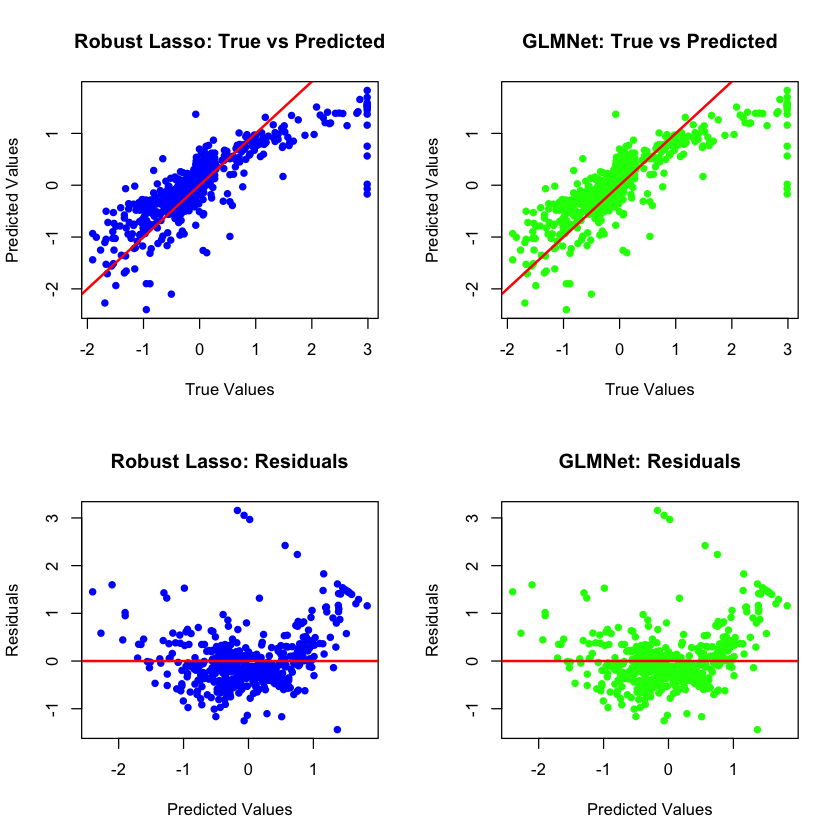

In [103]:

# 4. Visualize results
par(mfrow = c(2, 2))  # Set up a 2x2 plotting area

# Plot 1: True vs Predicted for robust_lasso
plot(y, y_pred_robust, main = "Robust Lasso: True vs Predicted",
     xlab = "True Values", ylab = "Predicted Values", col = "blue", pch = 16)
abline(0, 1, col = "red", lwd = 2)

# Plot 2: True vs Predicted for glmnet
plot(y, y_pred_glmnet, main = "GLMNet: True vs Predicted",
     xlab = "True Values", ylab = "Predicted Values", col = "green", pch = 16)
abline(0, 1, col = "red", lwd = 2)

# Plot 3: Residuals for robust_lasso
plot(y_pred_robust, y - y_pred_robust, main = "Robust Lasso: Residuals",
     xlab = "Predicted Values", ylab = "Residuals", col = "blue", pch = 16)
abline(h = 0, col = "red", lwd = 2)

# Plot 4: Residuals for glmnet
plot(y_pred_glmnet, y - y_pred_glmnet, main = "GLMNet: Residuals",
     xlab = "Predicted Values", ylab = "Residuals", col = "green", pch = 16)
abline(h = 0, col = "red", lwd = 2)

# 5. Print results
cat("\nPerformance Metrics:\n")
cat("MSE (Robust Lasso):", mse_robust, "\n")
cat("MSE (GLMNet):", mse_glmnet, "\n")

cat("\nRelative Error (Robust Lasso):", relative_error_robust, "\n")
cat("Relative Error (GLMNet):", relative_error_glmnet, "\n")

cat("\nR^2 (Robust Lasso):", r2_robust, "\n")
cat("R^2 (GLMNet):", r2_glmnet, "\n")

cat("\nSystem Time (Robust Lasso):", time_robust, "seconds\n")
cat("System Time (GLMNet):", time_glmnet, "seconds\n")

In [104]:
print(result_robust$method)

[1] "FISTA"


In [105]:
# Test using Diabetes Dataset

# Load necessary libraries
if (!requireNamespace("lars", quietly = TRUE)) {
  install.packages("lars")
}
if (!requireNamespace("glmnet", quietly = TRUE)) {
  install.packages("glmnet")
}

library(lars)
library(glmnet)

# Load Diabetes Dataset
data("diabetes")
X <- as.matrix(diabetes$x)  # Features
y <- diabetes$y             # Response variable

# Standardize X and y for consistency
X <- scale(X)
y <- scale(y)

# Set regularization parameter
lambda <- 0.1




In [106]:
# 1. Run robust_lasso
start_time_robust <- system.time({
  result_robust <- robust_lasso(X, y, lambda = lambda, method = "auto",priority = "scalability")
})
beta_robust <- result_robust$fit$beta
y_pred_robust <- cbind(1, X) %*% beta_robust  # Predictions from robust_lasso

# 2. Run glmnet
start_time_glmnet <- system.time({
  fit_glmnet <- glmnet(X, y, alpha = 1, lambda = lambda, intercept = TRUE)
})
beta_glmnet <- as.vector(coef(fit_glmnet, s = lambda))
y_pred_glmnet <- predict(fit_glmnet, X, s = lambda)

# 3. Calculate performance metrics
# Mean Squared Error (MSE)
mse_robust <- mean((y - y_pred_robust)^2)
mse_glmnet <- mean((y - y_pred_glmnet)^2)

# Relative Error
relative_error_robust <- sum(abs(y - y_pred_robust)) / sum(abs(y))
relative_error_glmnet <- sum(abs(y - y_pred_glmnet)) / sum(abs(y))

# R-squared (R^2)
r2_robust <- 1 - sum((y - y_pred_robust)^2) / sum((y - mean(y))^2)
r2_glmnet <- 1 - sum((y - y_pred_glmnet)^2) / sum((y - mean(y))^2)

# System Time
time_robust <- start_time_robust["elapsed"]
time_glmnet <- start_time_glmnet["elapsed"]



[1] "FISTA"



Performance Metrics:
MSE (Robust Lasso): 0.5268518 
MSE (GLMNet): 0.5268085 

Relative Error (Robust Lasso): 0.7078086 
Relative Error (GLMNet): 0.707772 

R^2 (Robust Lasso): 0.4719536 
R^2 (GLMNet): 0.4719969 

System Time (Robust Lasso): 0.001 seconds
System Time (GLMNet): 0.001 seconds


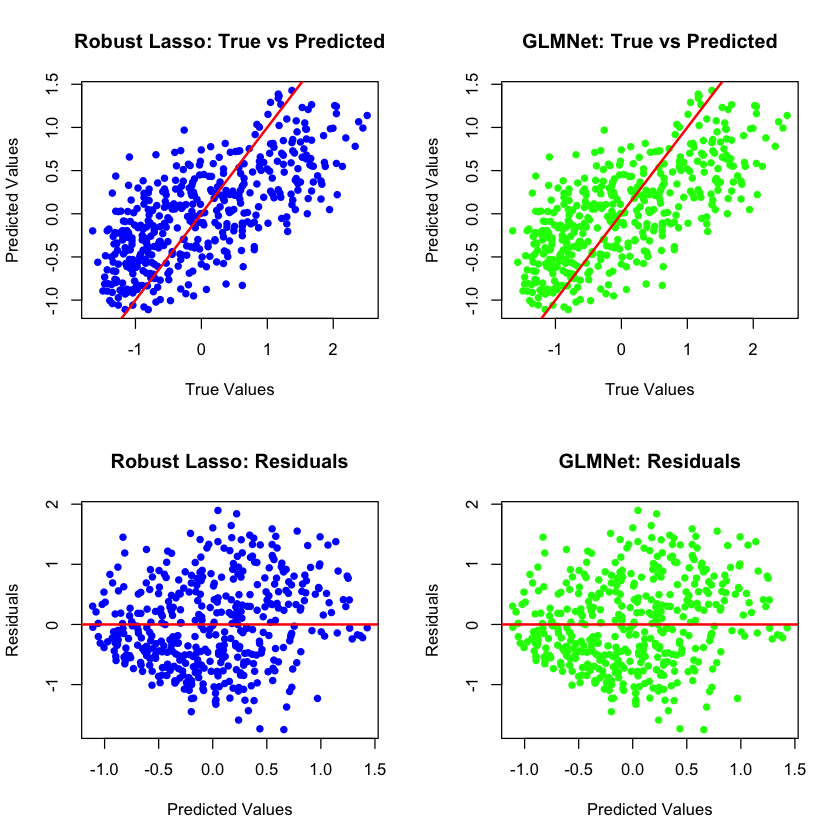

In [107]:
# 4. Visualize results
par(mfrow = c(2, 2))  # Set up a 2x2 plotting area

# Plot 1: True vs Predicted for robust_lasso
plot(y, y_pred_robust, main = "Robust Lasso: True vs Predicted",
     xlab = "True Values", ylab = "Predicted Values", col = "blue", pch = 16)
abline(0, 1, col = "red", lwd = 2)

# Plot 2: True vs Predicted for glmnet
plot(y, y_pred_glmnet, main = "GLMNet: True vs Predicted",
     xlab = "True Values", ylab = "Predicted Values", col = "green", pch = 16)
abline(0, 1, col = "red", lwd = 2)

# Plot 3: Residuals for robust_lasso
plot(y_pred_robust, y - y_pred_robust, main = "Robust Lasso: Residuals",
     xlab = "Predicted Values", ylab = "Residuals", col = "blue", pch = 16)
abline(h = 0, col = "red", lwd = 2)

# Plot 4: Residuals for glmnet
plot(y_pred_glmnet, y - y_pred_glmnet, main = "GLMNet: Residuals",
     xlab = "Predicted Values", ylab = "Residuals", col = "green", pch = 16)
abline(h = 0, col = "red", lwd = 2)

# 5. Print results
cat("\nPerformance Metrics:\n")
cat("MSE (Robust Lasso):", mse_robust, "\n")
cat("MSE (GLMNet):", mse_glmnet, "\n")

cat("\nRelative Error (Robust Lasso):", relative_error_robust, "\n")
cat("Relative Error (GLMNet):", relative_error_glmnet, "\n")

cat("\nR^2 (Robust Lasso):", r2_robust, "\n")
cat("R^2 (GLMNet):", r2_glmnet, "\n")

cat("\nSystem Time (Robust Lasso):", time_robust, "seconds\n")
cat("System Time (GLMNet):", time_glmnet, "seconds\n")

In [124]:
print(result_robust$method)

NULL


In [131]:
source("../R/robust_lasso.R")

[1] "FISTA"

Performance Metrics:
MSE (Robust Lasso): 0.5268518 
MSE (GLMNet): 0.5268085 


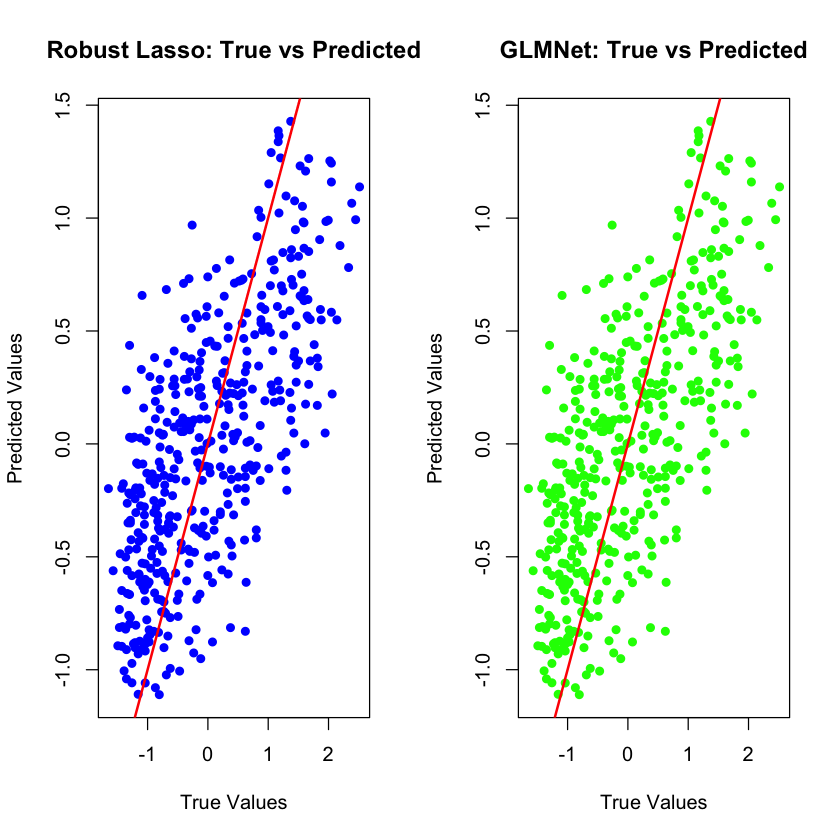

In [140]:
# Set a regularization parameter (lambda)
lambda <- 0.1

# Run robust_lasso
result_robust <- robust_lasso(X, y, lambda = lambda, data_size = "small", priority = "scalability")
beta_robust <- result_robust$fit$beta
y_pred_robust <- cbind(1, X) %*% beta_robust  # Include intercept in predictions

print(result_robust$method)
# Run glmnet
library(glmnet)
fit_glmnet <- glmnet(X, y, alpha = 1, lambda = lambda, intercept = TRUE)
beta_glmnet <- as.vector(coef(fit_glmnet, s = lambda))
y_pred_glmnet <- predict(fit_glmnet, X, s = lambda)

# Compare performance metrics
mse_robust <- mean((y - y_pred_robust)^2)
mse_glmnet <- mean((y - y_pred_glmnet)^2)

cat("\nPerformance Metrics:\n")
cat("MSE (Robust Lasso):", mse_robust, "\n")
cat("MSE (GLMNet):", mse_glmnet, "\n")

# Visualize true vs predicted for both methods
par(mfrow = c(1, 2))
plot(y, y_pred_robust, main = "Robust Lasso: True vs Predicted",
     xlab = "True Values", ylab = "Predicted Values", col = "blue", pch = 16)
abline(0, 1, col = "red", lwd = 2)

plot(y, y_pred_glmnet, main = "GLMNet: True vs Predicted",
     xlab = "True Values", ylab = "Predicted Values", col = "green", pch = 16)
abline(0, 1, col = "red", lwd = 2)
